# Import packages and functions

In [1]:
import sys
# force the notebook to look for files in the upper level directory
sys.path.insert(1, '../')

In [2]:
import numpy as np
import pandas as pd
import pymatgen as mg
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

# Set up constants

In [3]:
FULL_PATH = "../data/processed/IMT_Classification_Dataset_Full_Feature_Set_v9.xlsx"
METAL_SUMMARY_PATH = "../data/dataset_summary/metal_summary_processed.xlsx"
INSULATOR_SUMMARY_PATH = "../data/dataset_summary/insulator_summary_processed.xlsx"
MIT_SUMMARY_PATH = "../data/dataset_summary/mit_summary_processed.xlsx"
ML_METRICS_PATH = "../data/processed/model_metrics_comparison_with_raw.xlsx"
HUMAN_METRICS_PATH = "../data/human_binary_classification_results.csv"
SAVE_PATH = "../plots/"
SAVE_PLOT = True

# Define some helper functions

In [4]:
def return_num_elem(compound_name):
    """Return the number of elements in a compound as one of 'binary', 'ternary', 'quarternary'"""
    num_elems_str = "Other"
    num_elems = len(mg.Composition(compound_name).elements) 
    if num_elems == 2:
        num_elems_str = "Binary"
    elif num_elems == 3:
        num_elems_str = "Ternary"
    elif num_elems == 4:
        num_elems_str = "Quarternary"
    return num_elems_str


def autolabel(ax):
    """
    Attach a text label above each bar in *rects*, displaying its height.
    
    Code adapted from https://matplotlib.org/3.3.1/gallery/lines_bars_and_markers/barchart.html
    """
    for rect in ax.patches:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0.5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=24)

# Read in data

In [5]:
df_plot = pd.read_excel(FULL_PATH)
df_plot = df_plot.replace({"Label": {0: "Metal", 1: "Insulator", 2: "MIT"}})

In [6]:
df_plot

Compound  Label                                   struct_file_path  \
0          BaMoO3  Metal  ../data/Structures/Metals/BaMoO3_CollCode_2915...   
1          BaNiS2  Metal  ../data/Structures/Metals/BaNiS2_CollCode_2469...   
2          BaOsO3  Metal    ../data/Structures/Metals/BaOsO3_SD_0375565.cif   
3        Bi2Ru2O7  Metal  ../data/Structures/Metals/Bi2Ru2O7_CollCode_73...   
4        Ca3Ru2O7  Metal  ../data/Structures/Metals/Ca3Ru2O7_CollCode_15...   
..            ...    ...                                                ...   
223         V6O13    MIT  ../data/Structures/MIT_materials/HighT/V6O13_H...   
224         V8O15    MIT  ../data/Structures/MIT_materials/HighT/V8O15_H...   
225           VO2    MIT  ../data/Structures/MIT_materials/HighT/VO2_HT_...   
226         YNiO3    MIT  ../data/Structures/MIT_materials/HighT/YNiO3_6...   
227  YbFe4(CuO4)3    MIT  ../data/Structures/MIT_materials/HighT/YbCu3Fe...   

     maximum_MendeleevNumber  range_MendeleevNumber  avg_dev_MendeleevNumber  \
0                         87                     78                27.600000   
1                         88                     79                26.500000   
2                         87                     78                25.920000   
3                         87                     31                 9.157025   
4                         87                     80                29.361111   
..                       ...                    ...                      ...   
223                       87                     41                17.717452   
224                       87                     41                18.601134   
225                       87                     41                18.222222   
226                       87                     75                24.240000   
227                       87                     48                14.700000   

     range_AtomicWeight  mean_AtomicWeight  avg_dev_AtomicWeight  \
0             121.32760          56.257040             48.309168   
1             105.26200          65.037600             36.144700   
2             174.23060          75.111040             70.933968   
3             192.98100          66.554236             64.342519   
4              85.07060          36.197483             23.564431   
..                  ...                ...                   ...   
223            34.94210          27.033747             15.099633   
224            34.94210          28.153174             15.852749   
225            34.94210          27.646767             15.529822   
226            72.90645          39.119490             27.744108   
227           157.05460          38.953240             27.544608   

     mode_AtomicWeight  ...  max_xx_dists  min_xx_dists  avg_xx_dists  \
0              15.9994  ...      2.857256      2.857256      2.857256   
1              32.0650  ...      3.783737      3.137645      3.654519   
2              15.9994  ...      3.100000      2.893540      2.978994   
3              15.9994  ...      3.691300      2.717536      3.077187   
4              15.9994  ...      3.488882      2.740999      2.933553   
..                 ...  ...           ...           ...           ...   
223            15.9994  ...      3.269140      2.461773      2.767633   
224            15.9994  ...      3.474319      2.529565      2.819850   
225            15.9994  ...      2.725617      2.575183      2.675472   
226            15.9994  ...      3.184308      2.736503      2.827539   
227            15.9994  ...      2.924013      2.552849      2.744642   

           v_m        v_x         iv       iv_p1  est_hubbard_u  \
0   -44.108215  23.006209  40.330000   54.417000      10.523409   
1   -21.082598  20.132993  18.168838   35.187000      12.893512   
2   -36.659700  22.481523  41.000000   55.000000       8.412244   
3   -47.298875  24.715398  45.000000   59.000000      10.043255   
4   -43.378203  25.385677  45.000000   59.000000      10.277936   
.. 

# Plot the number of element distribution within each class

In [7]:
df_plot["num_elem"] = df_plot["Compound"].apply(return_num_elem)

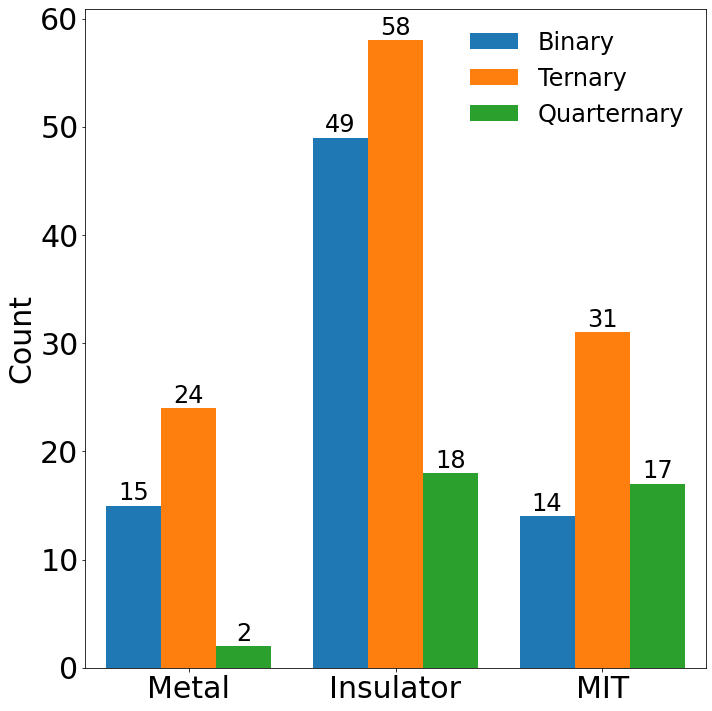

In [8]:
plt.figure(figsize=(10,10))
class_dist = sns.countplot(data=df_plot, x="Label", hue="num_elem", hue_order=["Binary", "Ternary", "Quarternary"],
                           saturation=1)
autolabel(class_dist)
class_dist.set_xlabel(None)
class_dist.set_ylabel("Count", fontsize=30)
class_dist.tick_params(labelsize=30)
class_dist.legend(fontsize=24, frameon=False)
plt.tight_layout()

In [9]:
if SAVE_PLOT: class_dist.figure.savefig(SAVE_PATH + "class_distribution_new.pdf", dpi=300, bbox_inches="tight")

# Plot the estimated charge transfer energy vs. estimate Hubbard U

In [10]:
x_plot = "est_charge_trans"
y_plot = "est_hubbard_u"
# get the relevant columns from the training set
df_charge_transfer_hubbard_plot = df_plot[["Compound", "Label", x_plot, y_plot]]
df_charge_transfer_hubbard_plot

Compound  Label  est_charge_trans  est_hubbard_u
0          BaMoO3  Metal         11.946426      10.523409
1          BaNiS2  Metal         21.595766      12.893512
2          BaOsO3  Metal          3.591515       8.412244
3        Bi2Ru2O7  Metal         11.876142      10.043255
4        Ca3Ru2O7  Metal          8.827434      10.277936
..            ...    ...               ...            ...
223         V6O13    MIT        -12.467020      58.592940
224         V8O15    MIT         11.940681      13.875184
225           VO2    MIT          9.779242      14.484546
226         YNiO3    MIT         10.393278      15.898371
227  YbFe4(CuO4)3    MIT          7.361181      16.597335

[228 rows x 4 columns]

In [11]:
charge_trans_min, charge_trans_max = 0, 21
hubbard_u_min, hubbard_u_max = 0, 30

In [12]:
print("Percentage of points plotted: :{:0.2f}%".format(
df_charge_transfer_hubbard_plot.loc[((df_charge_transfer_hubbard_plot.est_charge_trans >= charge_trans_min) & 
                                     (df_charge_transfer_hubbard_plot.est_charge_trans <= charge_trans_max)) &
                                    ((df_charge_transfer_hubbard_plot.est_hubbard_u >= hubbard_u_min) &
                                     (df_charge_transfer_hubbard_plot.est_hubbard_u <= hubbard_u_max))].shape[0] / df_charge_transfer_hubbard_plot.shape[0] * 100
    )
)

Percentage of points plotted: :79.39%


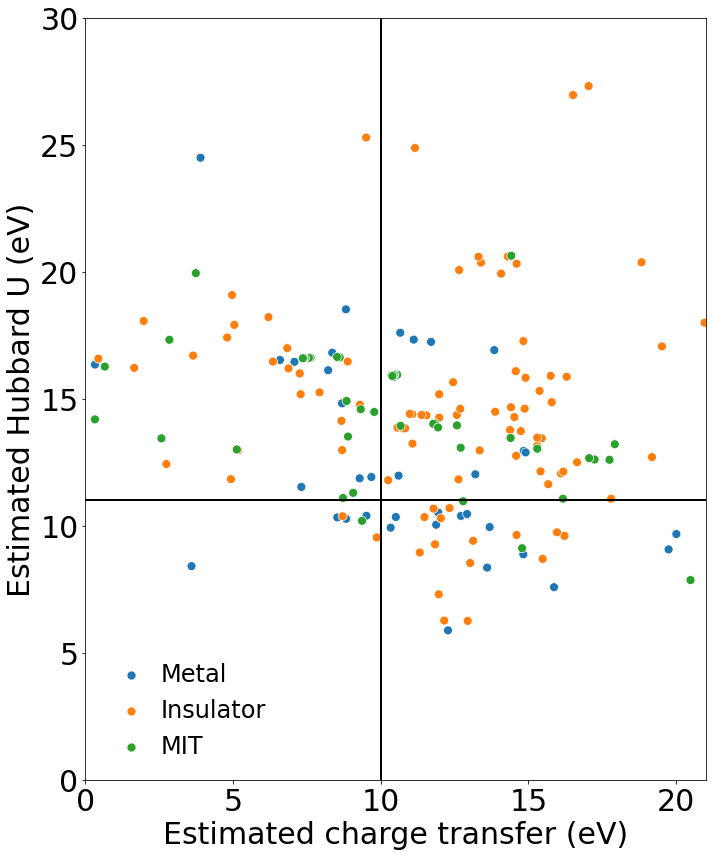

In [13]:
plt.figure(figsize=(10,12))
charge_hubbard = sns.scatterplot(data=df_charge_transfer_hubbard_plot, x=x_plot, y=y_plot, hue="Label", s=80)
charge_hubbard.set_xlabel("Estimated charge transfer (eV)", fontsize=30)
charge_hubbard.set_ylabel("Estimated Hubbard U (eV)", fontsize=30)
charge_hubbard.set_xlim(charge_trans_min, charge_trans_max)
charge_hubbard.set_ylim(hubbard_u_min, hubbard_u_max)
charge_hubbard.axvline(10, color='k', linestyle='-', linewidth=2)
charge_hubbard.axhline(11, color='k', linestyle='-', linewidth=2)
charge_hubbard.legend(loc='lower left', fontsize=24, markerscale=1.2, frameon=False, handletextpad=0.25)
charge_hubbard.tick_params(labelsize=30)
plt.tight_layout()

In [14]:
if SAVE_PLOT: charge_hubbard.figure.savefig(SAVE_PATH + "torrance_features_subset.pdf", dpi=300, bbox_inches="tight")

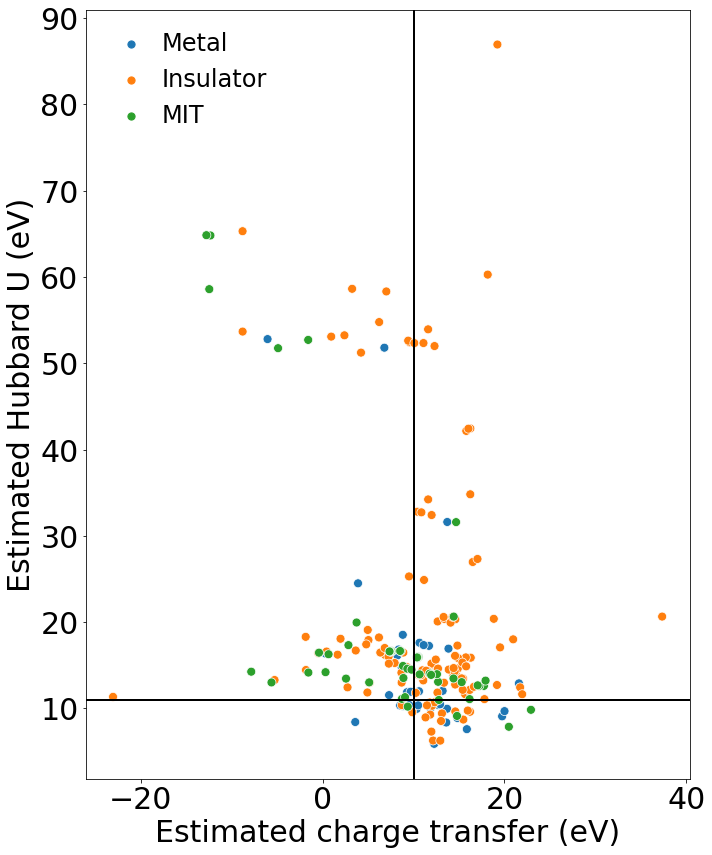

In [15]:
plt.figure(figsize=(10,12))
charge_hubbard = sns.scatterplot(data=df_charge_transfer_hubbard_plot, x=x_plot, y=y_plot, hue="Label", s=80)
charge_hubbard.set_xlabel("Estimated charge transfer (eV)", fontsize=30)
charge_hubbard.set_ylabel("Estimated Hubbard U (eV)", fontsize=30)
charge_hubbard.axvline(10, color='k', linestyle='-', linewidth=2)
charge_hubbard.axhline(11, color='k', linestyle='-', linewidth=2)
charge_hubbard.legend(loc='upper left', fontsize=24, markerscale=1.2, frameon=False, handletextpad=0.25)
charge_hubbard.tick_params(labelsize=30)
plt.tight_layout()

In [16]:
if SAVE_PLOT: charge_hubbard.figure.savefig(SAVE_PATH + "torrance_features_full.pdf", dpi=300, bbox_inches="tight")

# Plot the GII vs. the Average Deviation of the Covalent Radiusm

In [17]:
x_plot = "gii"
y_plot = "avg_dev_CovalentRadius"
# get the relevant columns from the training set
df_gii_cov_radius_plot = df_plot[["Compound", "Label", x_plot, y_plot]]
df_gii_cov_radius_plot

Compound  Label       gii  avg_dev_CovalentRadius
0          BaMoO3  Metal  0.321007               56.880000
1          BaNiS2  Metal  0.195702               38.875000
2          BaOsO3  Metal  0.817185               54.480000
3        Bi2Ru2O7  Metal  0.277386               37.487603
4        Ca3Ru2O7  Metal  0.117212               47.638889
..            ...    ...       ...                     ...
223         V6O13    MIT  0.198242               37.595568
224         V8O15    MIT  0.296188               39.470699
225           VO2    MIT  0.128538               38.666667
226         YNiO3    MIT  0.231001               43.680000
227  YbFe4(CuO4)3    MIT  0.379838               34.980000

[228 rows x 4 columns]

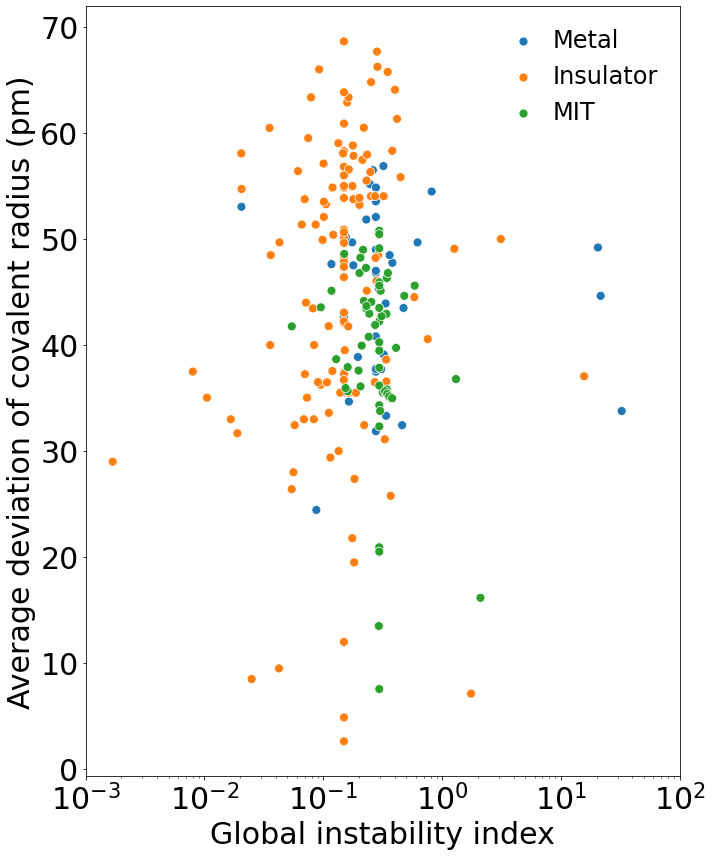

In [18]:
plt.figure(figsize=(10,12))
gii_cov_radius = sns.scatterplot(data=df_gii_cov_radius_plot, x=x_plot, y=y_plot, hue="Label", s=80)
gii_cov_radius.set_xscale("log")
gii_cov_radius.set_xlim(0.001, 100)
gii_cov_radius.set_xlabel("Global instability index", fontsize=30)
gii_cov_radius.set_ylabel("Average deviation of covalent radius (pm)", fontsize=30)
gii_cov_radius.legend(loc='upper right', fontsize=24, markerscale=1.2, frameon=False, handletextpad=0.25)
gii_cov_radius.tick_params(labelsize=30)
plt.tight_layout()

In [19]:
if SAVE_PLOT: gii_cov_radius.figure.savefig(SAVE_PATH + "gii_cov_radius.pdf", dpi=300, bbox_inches="tight")

# Plot the Range Mendeleev Number vs. the Average Deviation of the Covalent Radius

In [20]:
x_plot = "range_MendeleevNumber"
y_plot = "avg_dev_CovalentRadius"
# get the relevant columns from the training set
df_mendeleev_cov_radius_plot = df_plot[["Compound", "Label", x_plot, y_plot]]
df_mendeleev_cov_radius_plot

Compound  Label  range_MendeleevNumber  avg_dev_CovalentRadius
0          BaMoO3  Metal                     78               56.880000
1          BaNiS2  Metal                     79               38.875000
2          BaOsO3  Metal                     78               54.480000
3        Bi2Ru2O7  Metal                     31               37.487603
4        Ca3Ru2O7  Metal                     80               47.638889
..            ...    ...                    ...                     ...
223         V6O13    MIT                     41               37.595568
224         V8O15    MIT                     41               39.470699
225           VO2    MIT                     41               38.666667
226         YNiO3    MIT                     75               43.680000
227  YbFe4(CuO4)3    MIT                     48               34.980000

[228 rows x 4 columns]

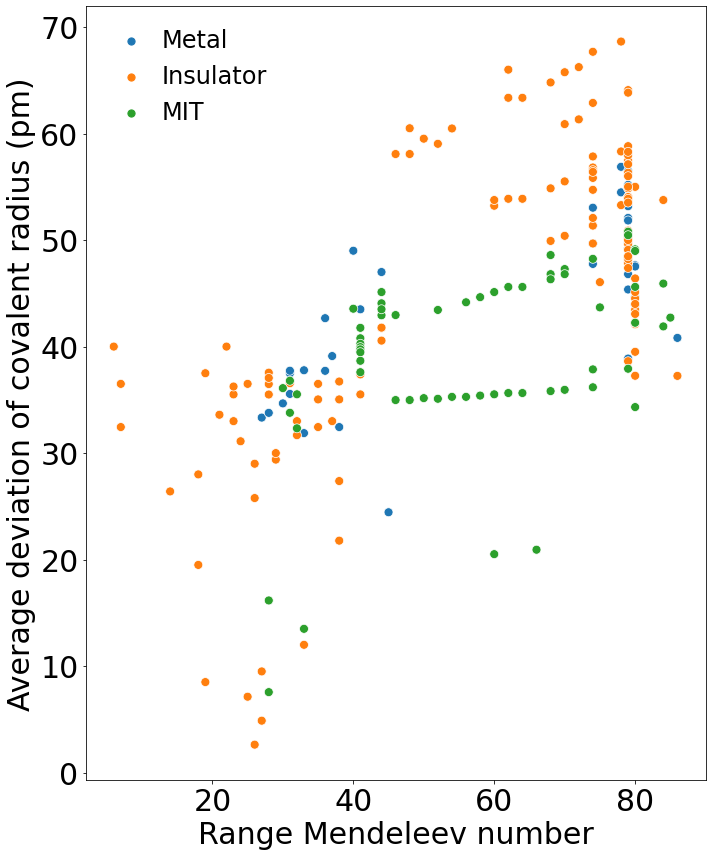

In [21]:
plt.figure(figsize=(10,12))
mendeleev_cov_radius = sns.scatterplot(data=df_mendeleev_cov_radius_plot, x=x_plot, y=y_plot, hue="Label", s=80)
mendeleev_cov_radius.set_xlabel("Range Mendeleev number", fontsize=30)
mendeleev_cov_radius.set_ylabel("Average deviation of covalent radius (pm)", fontsize=30)
mendeleev_cov_radius.legend(loc='upper left', fontsize=24, markerscale=1.2, frameon=False, handletextpad=0.25)
mendeleev_cov_radius.tick_params(labelsize=30)
plt.tight_layout()

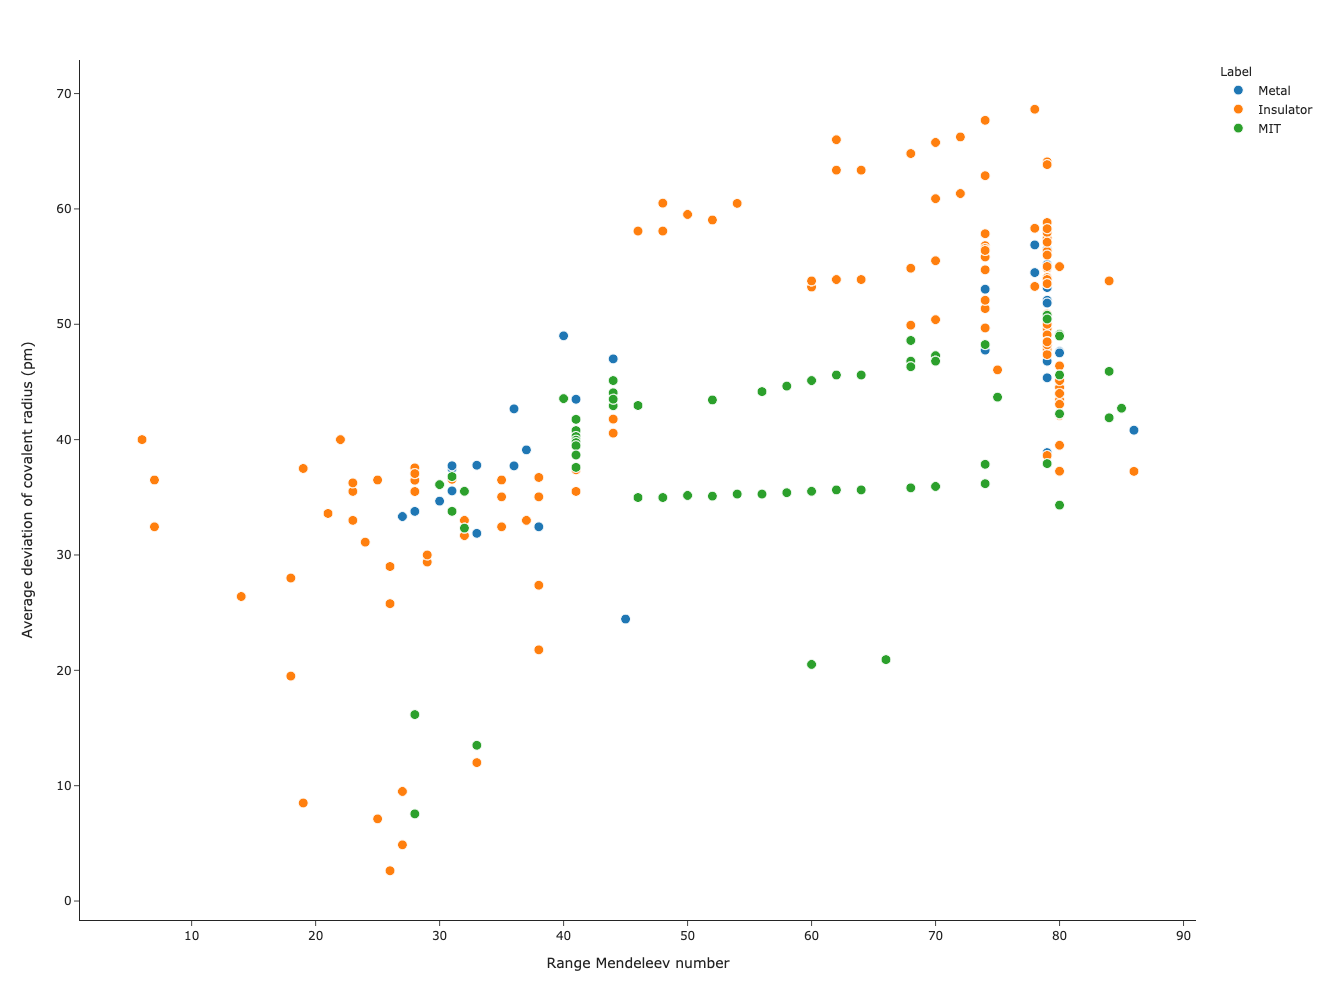

In [22]:
mendeleev_cov_radius_fig = px.scatter(df_plot, x=x_plot, y=y_plot, hover_name="Compound", 
                                      height=1000, width=1000, color="Label", template="simple_white",
                                      labels={
                                          x_plot: "Range Mendeleev number",
                                          y_plot: "Average deviation of covalent radius (pm)"
                                      })
mendeleev_cov_radius_fig.update_traces(mode='markers', marker_line_width=1, marker_size=10, marker_line_color="white")
mendeleev_cov_radius_fig.show()
mendeleev_cov_radius_fig.write_html(SAVE_PATH + "class_separation_interactive.html")

In [23]:
if SAVE_PLOT: mendeleev_cov_radius.figure.savefig(SAVE_PATH + "class_separation_new.pdf", dpi=300, bbox_inches="tight")

# Pairplot of 10 most important features for the MIT vs. non-MIT model

In [24]:
# handpicked ones
features_to_include = ["Label", # used for color coding
                       "gii",
                       "avg_dev_CovalentRadius",
                       "ewald_energy_per_atom",
                       "range_MendeleevNumber",
                       "avg_mm_dists",
                       "est_hubbard_u",
                       "est_charge_trans",
                       "avg_mx_dists",
                       "avg_xx_dists",
                       "maximum_MendeleevNumber"
                      ]

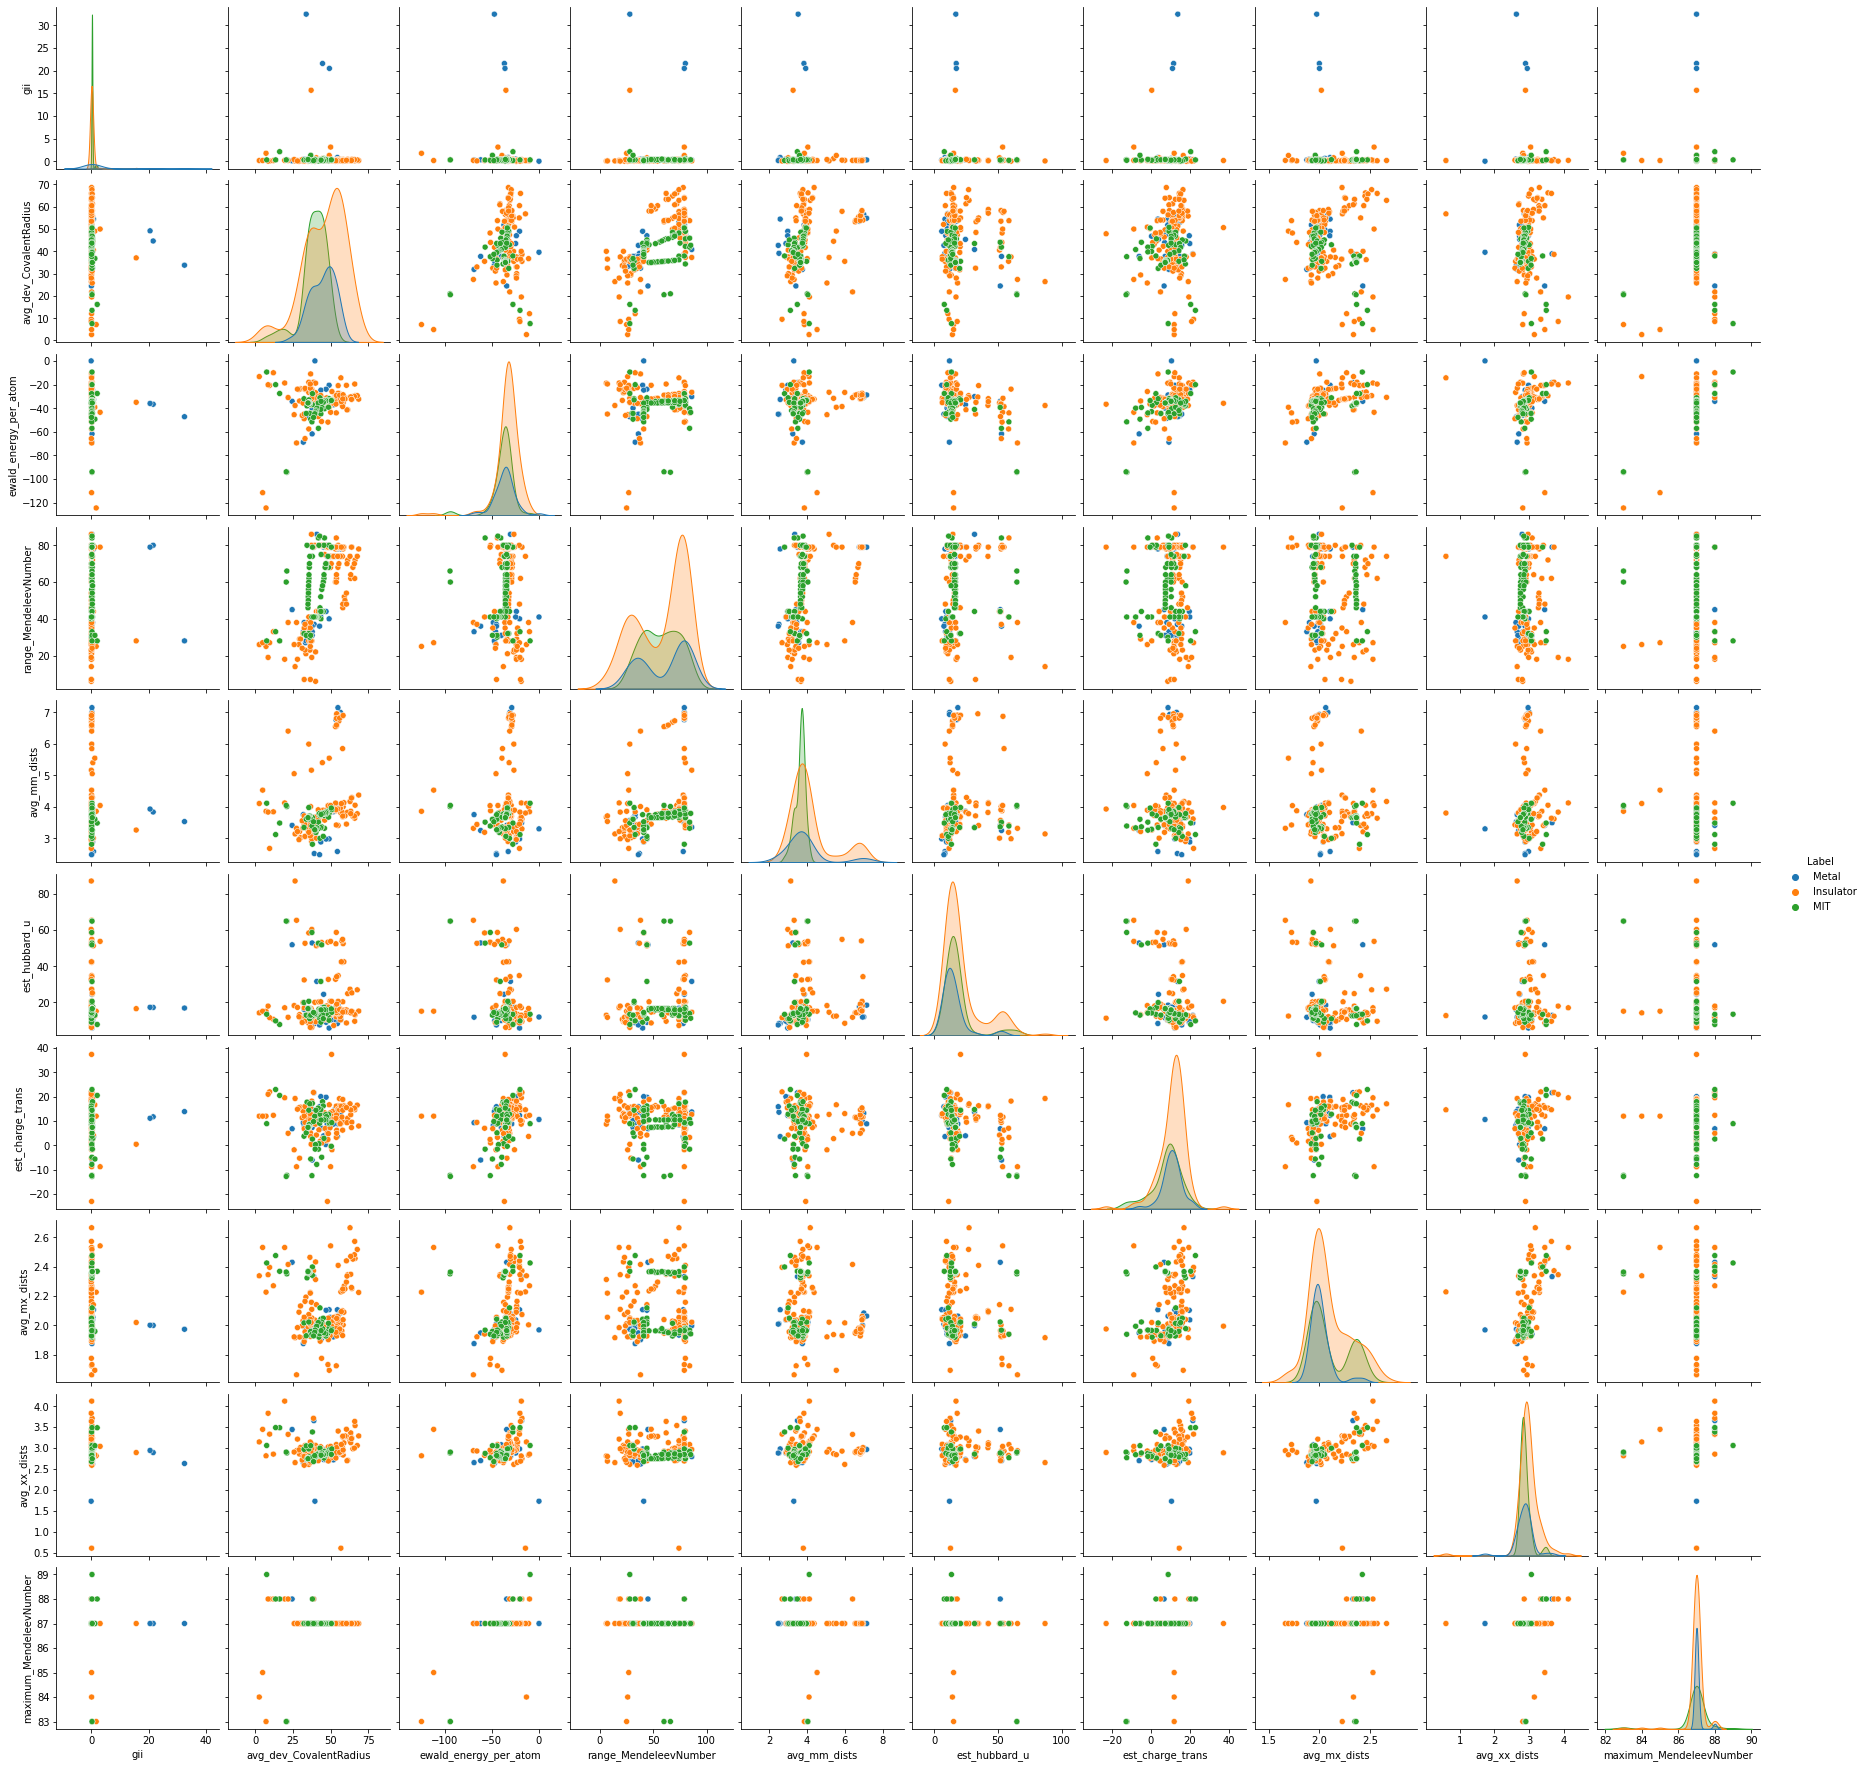

In [25]:
handpicked_features_pairwise_plot = sns.pairplot(df_plot[features_to_include], hue="Label")

In [26]:
if SAVE_PLOT: handpicked_features_pairwise_plot.fig.savefig(SAVE_PATH + "handpicked_features_pairwise_plot.pdf", dpi=300, bbox_inches="tight")

In [27]:
# ones selected based on SHAP values from the MIT classifier trained on the full feature set
features_to_include = ["Label", 
                       "gii",
                       "avg_dev_Electronegativity",
                       "est_charge_trans",
                       "avg_dev_neighbor_distance_variation",
                       "avg_dev_GSvolume_pa",
                       "avg_dev_Row",
                       "avg_dev_NUnfilled",
                       "range_GSvolume_pa",
                       "avg_dev_NValence",
                       "range_neighbor_distance_variation"
                      ]

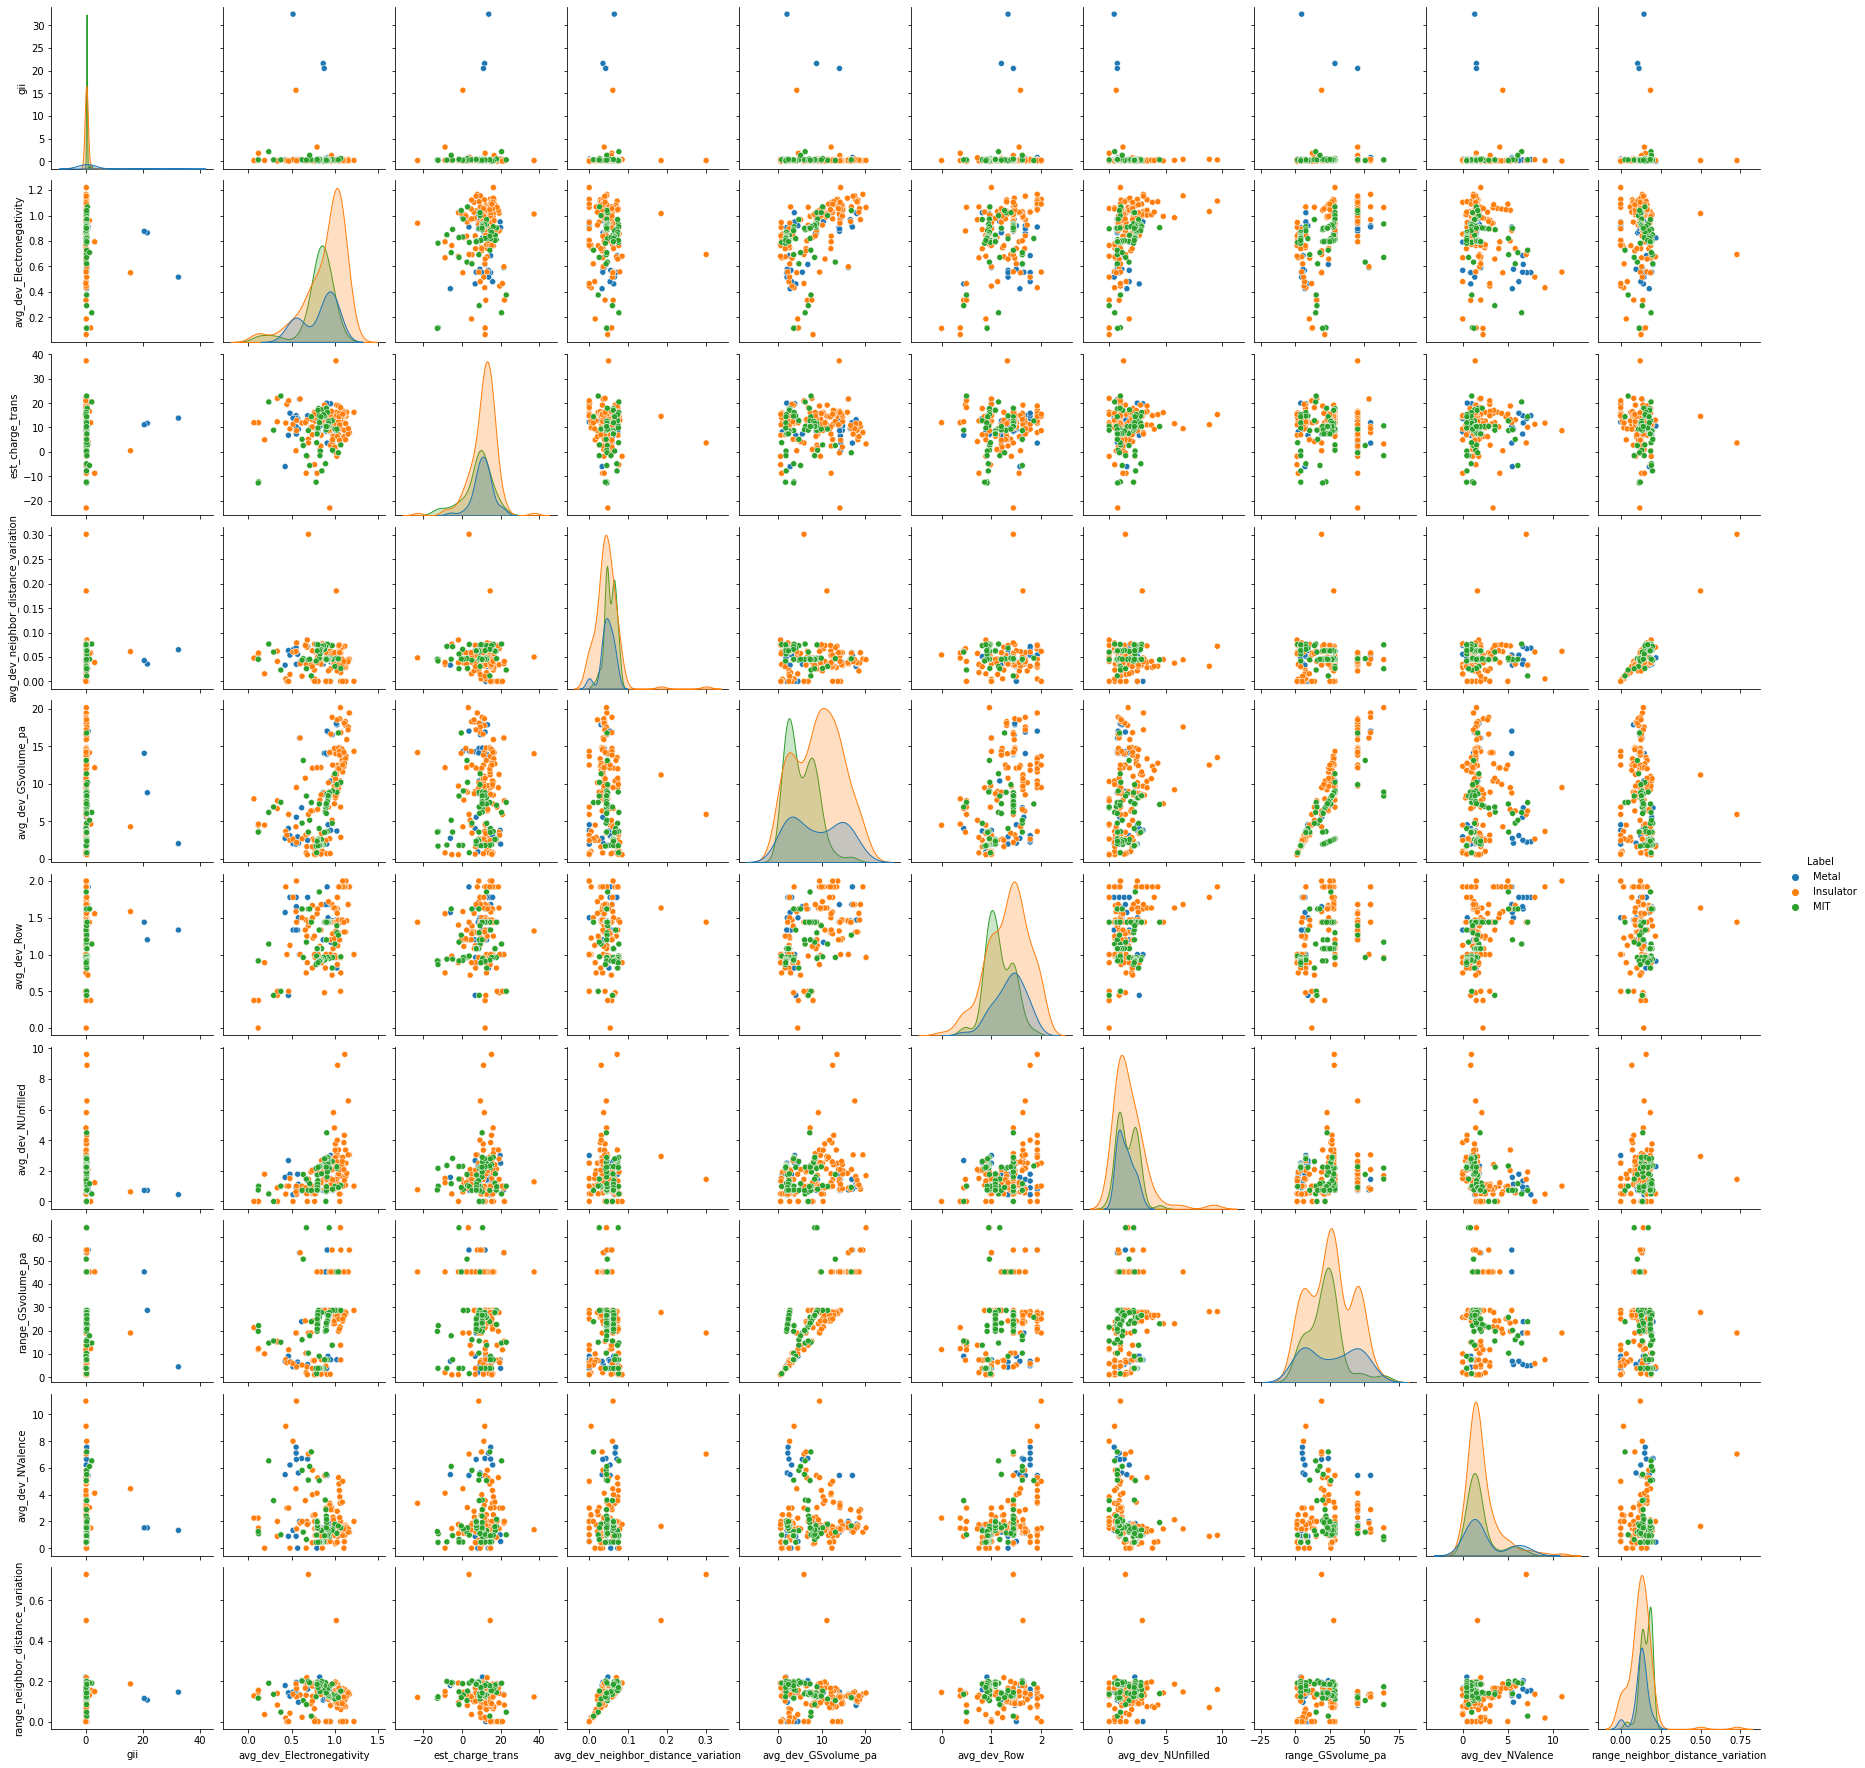

In [28]:
shap_features_pairwise_plot = sns.pairplot(df_plot[features_to_include], hue="Label")

In [29]:
if SAVE_PLOT: shap_features_pairwise_plot.fig.savefig(SAVE_PATH + "shap_features_pairwise_plot.pdf", dpi=300, bbox_inches="tight")

# Dataset summary plot

First define the subplot dataset and variables

In [30]:
df_metal = pd.read_excel(METAL_SUMMARY_PATH)
df_insulator = pd.read_excel(INSULATOR_SUMMARY_PATH)
df_mit = pd.read_excel(MIT_SUMMARY_PATH)

x_metal, y_metal = "volume_per_site", "rho_300K(Ohm_cm)"
x_insulator, y_insulator = "band_gap", "ref_index"
x_mit, y_mit = "d_valence", "Tmit"

## Plotly figure for annotation

The interactive plots may not show up correctly without the plotly extension in JupyterLab.

### Metals

In [31]:
print("# of metals plotted: {}".format(df_metal.dropna().shape[0]))
metal_fig = px.scatter(df_metal, x=x_metal, y=y_metal, hover_name="Compound", 
                       height=500, width=1000, hover_data=[df_metal.index], log_y=True)
metal_fig.show()

# of metals plotted: 40


### Insulators

In [32]:
print("# of insulators plotted: {}".format(df_insulator.dropna().shape[0]))
insulator_fig = px.scatter(df_insulator, x=x_insulator, y=y_insulator, hover_name="Compound", 
                           height=500, width=1000, hover_data=[df_insulator.index])
insulator_fig.show()

# of insulators plotted: 62


### MITs

In [33]:
print("# of MITs plotted: {}".format(df_mit.dropna().shape[0]))
mit_fig = px.scatter(df_mit, x=x_mit, y=y_mit, hover_name="Compound", 
                     height=500, width=1000, hover_data=[df_mit.index])
mit_fig.show()

# of MITs plotted: 61


### Static image

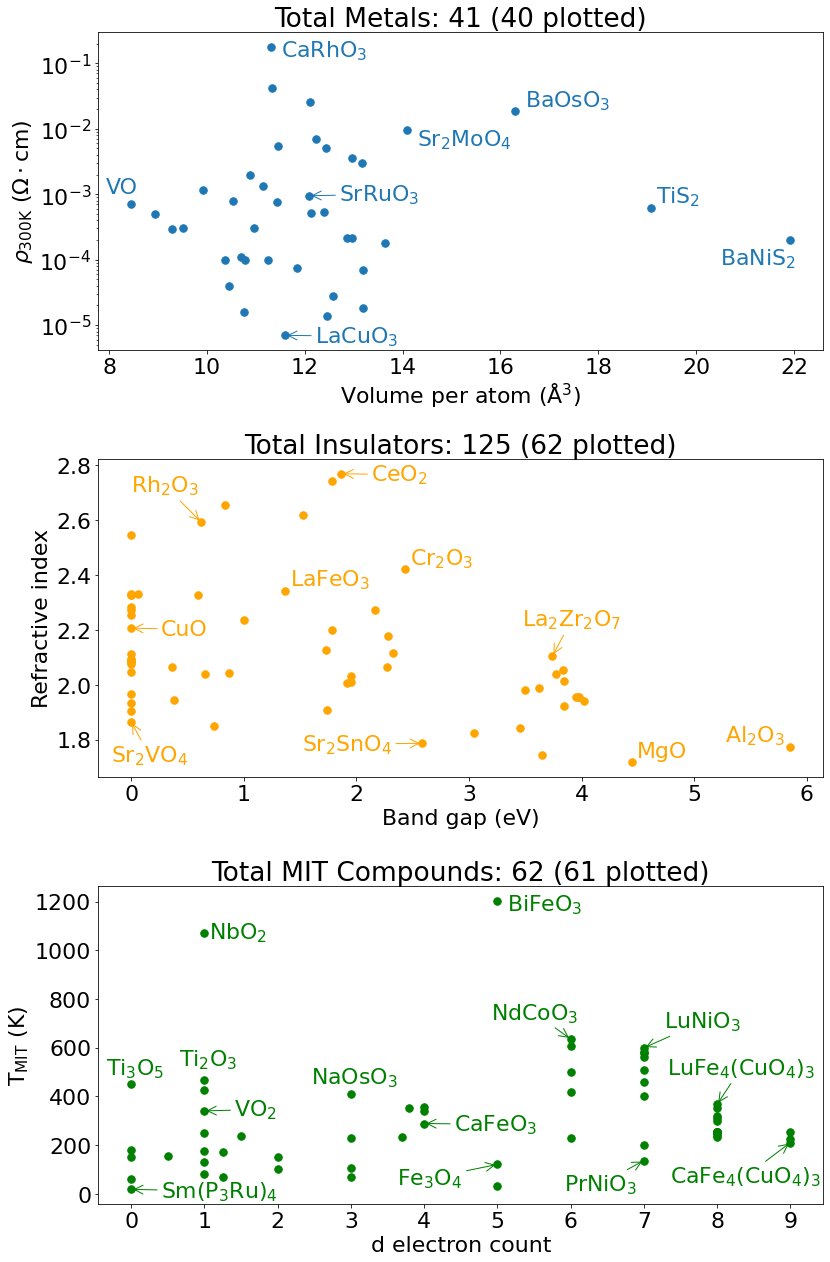

In [34]:
MARKERSIZE = 15
font = {'size': 22}
mpl.rc('font', **font)

summary_plot, ax = plt.subplots(3,1, figsize = (12, 18))

# metal subplot
ax[0].plot(df_metal[x_metal], df_metal[y_metal], ".", markersize = MARKERSIZE)
ax[0].set_yscale("log")
ax[0].set_xlabel(r"Volume per atom ($\mathrm{\AA}^3$)")
ax[0].set_ylabel(r"$\rho_{300 \mathrm{K}}$ ($\Omega\cdot$cm)")
ax[0].set_title("Total Metals: {} ({} plotted)".format(df_metal.shape[0], df_metal.dropna().shape[0]))
# annotate CaRhO3
ax[0].annotate(r"CaRhO$_3$", (df_metal[x_metal][7], df_metal[y_metal][7]), 
               color = "#1f77b4", textcoords = "offset points", xytext = (10, -10))
# annotate VO
ax[0].annotate(r"VO", (df_metal[x_metal][38], df_metal[y_metal][38]), 
               color = "#1f77b4", textcoords = "offset points", xytext = (-25, 10))
# annotate Sr2MoO4
ax[0].annotate(r"Sr$_2$MoO$_4$", (df_metal[x_metal][22], df_metal[y_metal][22]), 
               color = "#1f77b4", textcoords = "offset points", xytext = (10, -15))
# annotate BaOsO3
ax[0].annotate(r"BaOsO$_3$", (df_metal[x_metal][2], df_metal[y_metal][2]), 
               color = "#1f77b4", textcoords = "offset points", xytext = (10, 5))
# annotate TiS2
ax[0].annotate(r"TiS$_2$", (df_metal[x_metal][36], df_metal[y_metal][36]), 
               color = "#1f77b4", textcoords = "offset points", xytext = (5, 5))
# annotate BaNiS2
ax[0].annotate(r"BaNiS$_2$", (df_metal[x_metal][1], df_metal[y_metal][1]), 
               color = "#1f77b4", textcoords = "offset points", xytext = (-70, -25))
# annotate SrRuO3
ax[0].annotate(r"SrRuO$_3$", (df_metal[x_metal][33], df_metal[y_metal][33]), 
               color = "#1f77b4", textcoords = "offset points", xytext = (30, -5),
               arrowprops=dict(color="#1f77b4", arrowstyle = "->"))
# annotate LaCuO3
ax[0].annotate(r"LaCuO$_3$", (df_metal[x_metal][10], df_metal[y_metal][10]), 
               color = "#1f77b4", textcoords = "offset points", xytext = (30, -7),
               arrowprops=dict(color="#1f77b4", arrowstyle = "->"))


# insulator subplot
ax[1].plot(df_insulator[x_insulator], df_insulator[y_insulator], ".", color="orange", markersize = MARKERSIZE)
ax[1].set_xlabel("Band gap (eV)") 
ax[1].set_ylabel("Refractive index")
ax[1].set_title("Total Insulators: {} ({} plotted)".format(df_insulator.shape[0], df_insulator.dropna().shape[0]))
# annotate CuO
ax[1].annotate(r"CuO", (df_insulator[x_insulator][34], df_insulator[y_insulator][34]), 
               color = "orange", textcoords = "offset points", xytext = (30, -7),
               arrowprops=dict(color="orange", arrowstyle = "->"))
# annotate Sr2VO4
ax[1].annotate(r"Sr$_2$VO$_4$", (df_insulator[x_insulator][101], df_insulator[y_insulator][101]), 
               color = "orange", textcoords = "offset points", xytext = (-20, -40),
               arrowprops=dict(color="orange", arrowstyle = "->"))
# annotate Rh2O3
ax[1].annotate(r"Rh$_2$O$_3$", (df_insulator[x_insulator][82], df_insulator[y_insulator][82]), 
               color = "orange", textcoords = "offset points", xytext = (-70, 30),
               arrowprops=dict(color="orange", arrowstyle = "->"))
# annotate CeO2
ax[1].annotate(r"CeO$_2$", (df_insulator[x_insulator][23], df_insulator[y_insulator][23]), 
               color = "orange", textcoords = "offset points", xytext = (30, -7),
               arrowprops=dict(color="orange", arrowstyle = "->"))
# annotate Cr2O3
ax[1].annotate(r"Cr$_2$O$_3$", (df_insulator[x_insulator][29], df_insulator[y_insulator][29]), 
               color = "orange", textcoords = "offset points", xytext = (5, 5))
# annotate La2Zr2O7
ax[1].annotate(r"La$_2$Zr$_2$O$_7$", (df_insulator[x_insulator][51], df_insulator[y_insulator][51]), 
               color = "orange", textcoords = "offset points", xytext = (-30, 30),
               arrowprops=dict(color="orange", arrowstyle = "->"))
# annotate Sr2SnO4
ax[1].annotate(r"Sr$_2$SnO$_4$", (df_insulator[x_insulator][99], df_insulator[y_insulator][99]), 
               color = "orange", textcoords = "offset points", xytext = (-120, -7),
               arrowprops=dict(color="orange", arrowstyle = "->"))
# annotate LaFeO3
ax[1].annotate(r"LaFeO$_3$", (df_insulator[x_insulator][53], df_insulator[y_insulator][53]), 
               color = "orange", textcoords = "offset points", xytext = (5, 5))
# annotate MgO
ax[1].annotate(r"MgO", (df_insulator[x_insulator][61], df_insulator[y_insulator][61]), 
               color = "orange", textcoords = "offset points", xytext = (5, 5))
# annotate Al2O3
ax[1].annotate(r"Al$_2$O$_3$", (df_insulator[x_insulator][1], df_insulator[y_insulator][1]), 
               color = "orange", textcoords = "offset points", xytext = (-65, 5))

# mit subplot
ax[2].plot(df_mit[x_mit], df_mit[y_mit], ".", color="green", markersize = MARKERSIZE)
ax[2].set_xlabel("d electron count")
ax[2].set_ylabel(r"T$_{\mathrm{MIT}}$ (K)")
ax[2].set_xticks(np.linspace(0, 9, 10))
ax[2].set_title("Total MIT Compounds: {} ({} plotted)".format(df_mit.shape[0], df_mit.dropna().shape[0]))
# annotate NbO2
ax[2].annotate(r"NbO$_2$", (df_mit[x_mit][30], df_mit[y_mit][30]), 
               color = "green", textcoords = "offset points", xytext = (5, -5))
# annotate BiFeO3
ax[2].annotate(r"BiFeO$_3$", (df_mit[x_mit][15], df_mit[y_mit][15]), 
               color = "green", textcoords = "offset points", xytext = (10, -10))
# annotate Ti3O5
ax[2].annotate(r"Ti$_3$O$_5$", (df_mit[x_mit][48], df_mit[y_mit][48]), 
               color = "green", textcoords = "offset points", xytext = (-25, 10))
# annotate Sm(P3Ru)4
ax[2].annotate(r"Sm(P$_3$Ru)$_4$", (df_mit[x_mit][40], df_mit[y_mit][40]), 
               color = "green", textcoords = "offset points", xytext = (30, -8),
               arrowprops=dict(color="green", arrowstyle = "->"))
# annotate Ti2O3
ax[2].annotate(r"Ti$_2$O$_3$", (df_mit[x_mit][47], df_mit[y_mit][47]), 
               color = "green", textcoords = "offset points", xytext = (-25, 15))
# annotate VO2
ax[2].annotate(r"VO$_2$", (df_mit[x_mit][59], df_mit[y_mit][59]), 
               color = "green", textcoords = "offset points", xytext = (30, -5),
               arrowprops=dict(color="green", arrowstyle = "->"))
# annotate NaOsO3
ax[2].annotate(r"NaOsO$_3$", (df_mit[x_mit][29], df_mit[y_mit][29]), 
               color = "green", textcoords = "offset points", xytext = (-40, 10))
# annotate CaFeO3
ax[2].annotate(r"CaFeO$_3$", (df_mit[x_mit][5], df_mit[y_mit][5]), 
               color = "green", textcoords = "offset points", xytext = (30, -7),
               arrowprops=dict(color="green", arrowstyle = "->"))
# annotate Fe3O4
ax[2].annotate(r"Fe$_3$O$_4$", (df_mit[x_mit][14], df_mit[y_mit][14]), 
               color = "green", textcoords = "offset points", xytext = (-100, -20),
               arrowprops=dict(color="green", arrowstyle = "->"))
# annotate NdCoO3
ax[2].annotate(r"NdCoO$_3$", (df_mit[x_mit][32], df_mit[y_mit][32]), 
               color = "green", textcoords = "offset points", xytext = (-80, 20),
               arrowprops=dict(color="green", arrowstyle = "->"))
# annotate LuNiO3
ax[2].annotate(r"LuNiO$_3$", (df_mit[x_mit][27], df_mit[y_mit][27]), 
               color = "green", textcoords = "offset points", xytext = (20, 20),
               arrowprops=dict(color="green", arrowstyle = "->"))
# annotate PrNiO3
ax[2].annotate(r"PrNiO$_3$", (df_mit[x_mit][39], df_mit[y_mit][39]), 
               color = "green", textcoords = "offset points", xytext = (-80, -30),
               arrowprops=dict(color="green", arrowstyle = "->"))
# annotate LuFe4(CuO4)3
ax[2].annotate(r"LuFe$_4$(CuO$_4$)$_3$", (df_mit[x_mit][26], df_mit[y_mit][26]), 
               color = "green", textcoords = "offset points", xytext = (-50, 30),
               arrowprops=dict(color="green", arrowstyle = "->"))
# annotate CaFe4(CuO4)3
ax[2].annotate(r"CaFe$_4$(CuO$_4$)$_3$", (df_mit[x_mit][4], df_mit[y_mit][4]), 
               color = "green", textcoords = "offset points", xytext = (-120, -40),
               arrowprops=dict(color="green", arrowstyle = "->"))

summary_plot.tight_layout()

In [35]:
if SAVE_PLOT: summary_plot.savefig(SAVE_PATH + "data_summary.pdf", dpi=300, bbox_inches="tight")

# Human vs. ML

## Read in ML metric data

In [36]:
df_ml_metrics = pd.read_excel(ML_METRICS_PATH)
df_ml_metrics = df_ml_metrics.loc[(df_ml_metrics.model_type == "XGBClassifier") & 
                                  (df_ml_metrics.metric_name != "roc_auc") & 
                                  (df_ml_metrics.positive_class != "Multiclass")]
df_ml_metrics["raw_metric"] = pd.eval(df_ml_metrics["raw_metric"])
df_ml_metrics = df_ml_metrics.drop(columns=["metric_value", "metric_dispersion"]).explode(column="raw_metric", ignore_index=True)
df_ml_metrics

model_type positive_class         metric_name raw_metric
0   XGBClassifier          Metal  precision_weighted   0.869565
1   XGBClassifier          Metal  precision_weighted   0.862778
2   XGBClassifier          Metal  precision_weighted   0.887765
3   XGBClassifier          Metal  precision_weighted    0.83726
4   XGBClassifier          Metal  precision_weighted    0.85641
..            ...            ...                 ...        ...
85  XGBClassifier            MIT         f1_weighted   0.826282
86  XGBClassifier            MIT         f1_weighted   0.845918
87  XGBClassifier            MIT         f1_weighted   0.822222
88  XGBClassifier            MIT         f1_weighted   0.821398
89  XGBClassifier            MIT         f1_weighted   0.849734

[90 rows x 4 columns]

In [37]:
df_human_metrics = pd.read_csv(HUMAN_METRICS_PATH)
df_human_metrics

model_type positive_class         metric_name  raw_metric
0        Human          Metal  precision_weighted    0.511905
1        Human          Metal  precision_weighted    0.555556
2        Human          Metal  precision_weighted    0.375000
3        Human          Metal  precision_weighted    0.555556
4        Human          Metal  precision_weighted    0.625000
..         ...            ...                 ...         ...
472      Human            MIT         f1_weighted    0.677066
473      Human            MIT         f1_weighted    0.630621
474      Human            MIT         f1_weighted    0.679167
475      Human            MIT         f1_weighted    0.945859
476      Human            MIT         f1_weighted    0.473304

[477 rows x 4 columns]

In [38]:
df_combined_metrics = pd.concat([df_ml_metrics, df_human_metrics], ignore_index=True)
df_combined_metrics

model_type positive_class         metric_name raw_metric
0    XGBClassifier          Metal  precision_weighted   0.869565
1    XGBClassifier          Metal  precision_weighted   0.862778
2    XGBClassifier          Metal  precision_weighted   0.887765
3    XGBClassifier          Metal  precision_weighted    0.83726
4    XGBClassifier          Metal  precision_weighted    0.85641
..             ...            ...                 ...        ...
562          Human            MIT         f1_weighted   0.677066
563          Human            MIT         f1_weighted   0.630621
564          Human            MIT         f1_weighted   0.679167
565          Human            MIT         f1_weighted   0.945859
566          Human            MIT         f1_weighted   0.473304

[567 rows x 4 columns]

## Define a helper function to select relevant metrics

In [39]:
def get_metric(pos_class, df_input):
    """A helper function to select the raw metric value the given positive class"""
    df_selected = df_input.loc[df_input.positive_class == pos_class]
    return df_selected

## Define plot constants

In [40]:
MIT_TITLE = "T"
METAL_TITLE = "M"
INSULATOR_TITLE = "I"
TITLES = [METAL_TITLE, INSULATOR_TITLE, MIT_TITLE]

TICK_SIZE = 19
BARWIDTH = 0.2
CAPSIZE = 5

## Compare performance

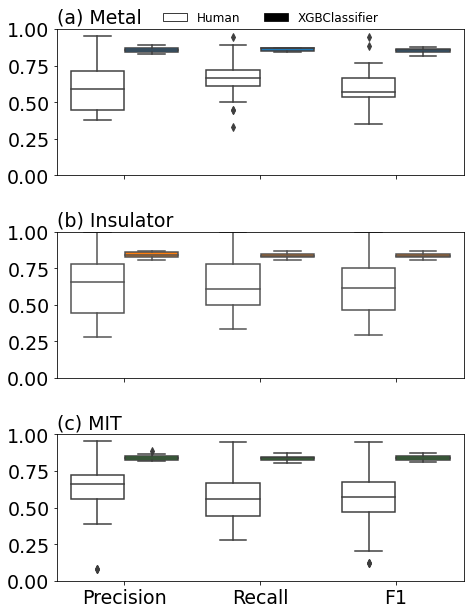

In [41]:
f, axarr = plt.subplots(nrows=3, sharex=True, sharey=True, figsize=(7, 9))

pos_classes = ["Metal", "Insulator", "MIT"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Plot the three subplots in the order of "Metal", "Insulator", "MIT"
for i, (pos_class, color) in enumerate(zip(pos_classes, colors)):
    tit = ['(a) Metal', '(b) Insulator', '(c) MIT'][i]
    ax = sns.boxplot(data=get_metric(pos_class, df_combined_metrics), x="metric_name", y="raw_metric", hue="model_type", hue_order=["Human", "XGBClassifier"], 
                     palette=sns.color_palette(("w", color)), saturation=1, ax=axarr[i])
    axarr[i] = ax
    if i == 0:
        axarr[i].legend(frameon=False, loc=(0.25, 1),
                        ncol=2, fontsize=12)
        leg = axarr[i].get_legend()
        leg.legendHandles[0].set_color("white")
        leg.legendHandles[0].set_edgecolor("black")
        leg.legendHandles[1].set_color("black")
    else:
        axarr[i].get_legend().remove()
    
    axarr[i].set_xlabel(None)
    axarr[i].set_ylabel(None)
    axarr[i].set_ylim(0, 1.0)
    axarr[i].set_yticks([0, 0.25, 0.5, 0.75, 1])
    axarr[i].set_title(tit, loc='left', fontsize=TICK_SIZE)
    axarr[i].tick_params(labelsize=TICK_SIZE)
    
f.subplots_adjust(hspace=0.1)
# Hide x labels and tick labels for all but bottom plot.
plt.xticks((0, 1, 2), ('Precision', 'Recall', 'F1'))
plt.tight_layout()

In [42]:
if SAVE_PLOT: f.savefig(SAVE_PATH + "human_ml_comparison.pdf", dpi=300, bbox_inches="tight")